## Yolo v8

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image


In [ ]:

import os
HOME = os.getcwd()
print(HOME)


/content


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet


/content/datasets


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="CWvzpJulXQJxjGIkciAp")
project = rf.workspace("stop-go-sign").project("road-segmentation-0cbys")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Road-Segmentation-2 in yolov8:: 100%|██████████| 270/270 [00:00<00:00, 4835.35it/s]


In [ ]:
%cd {HOME}
!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=640


/content
100% 22.8M/22.8M [00:00<00:00, 236MB/s]
New https://pypi.org/project/ultralytics/8.1.47 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/datasets/Road-Segmentation-2/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1

/content


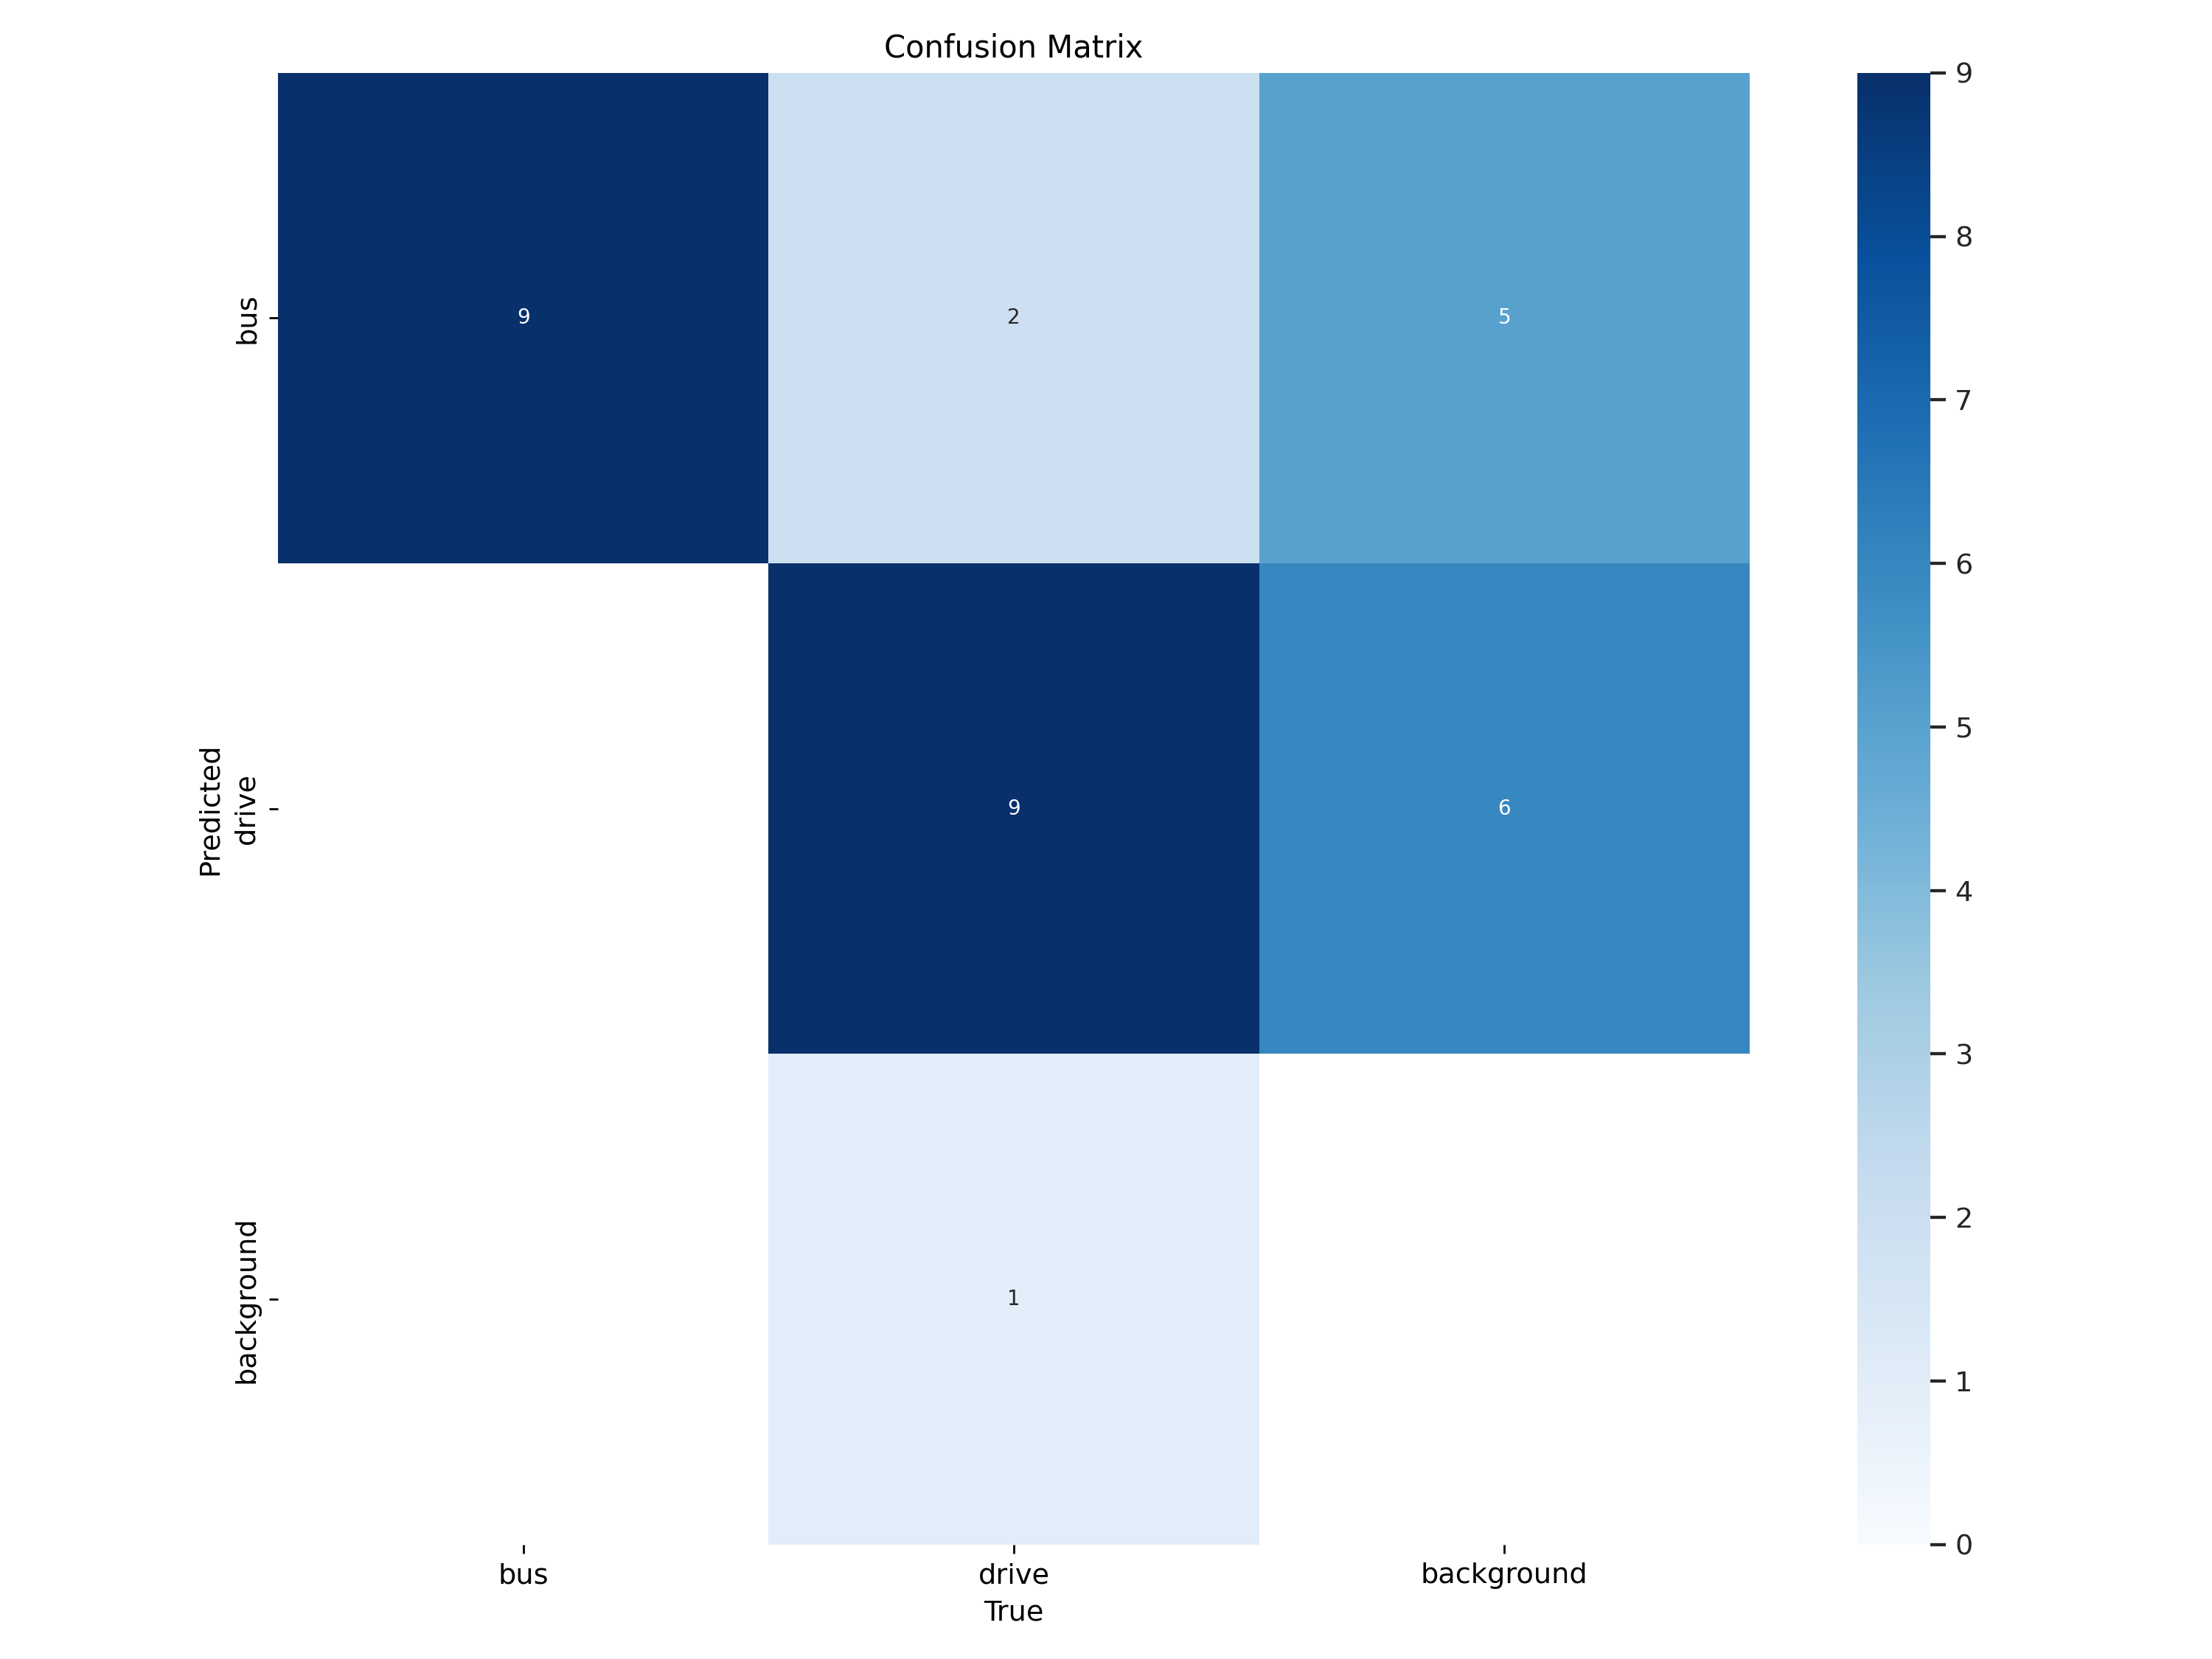

In [ ]:

%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=600)

/content


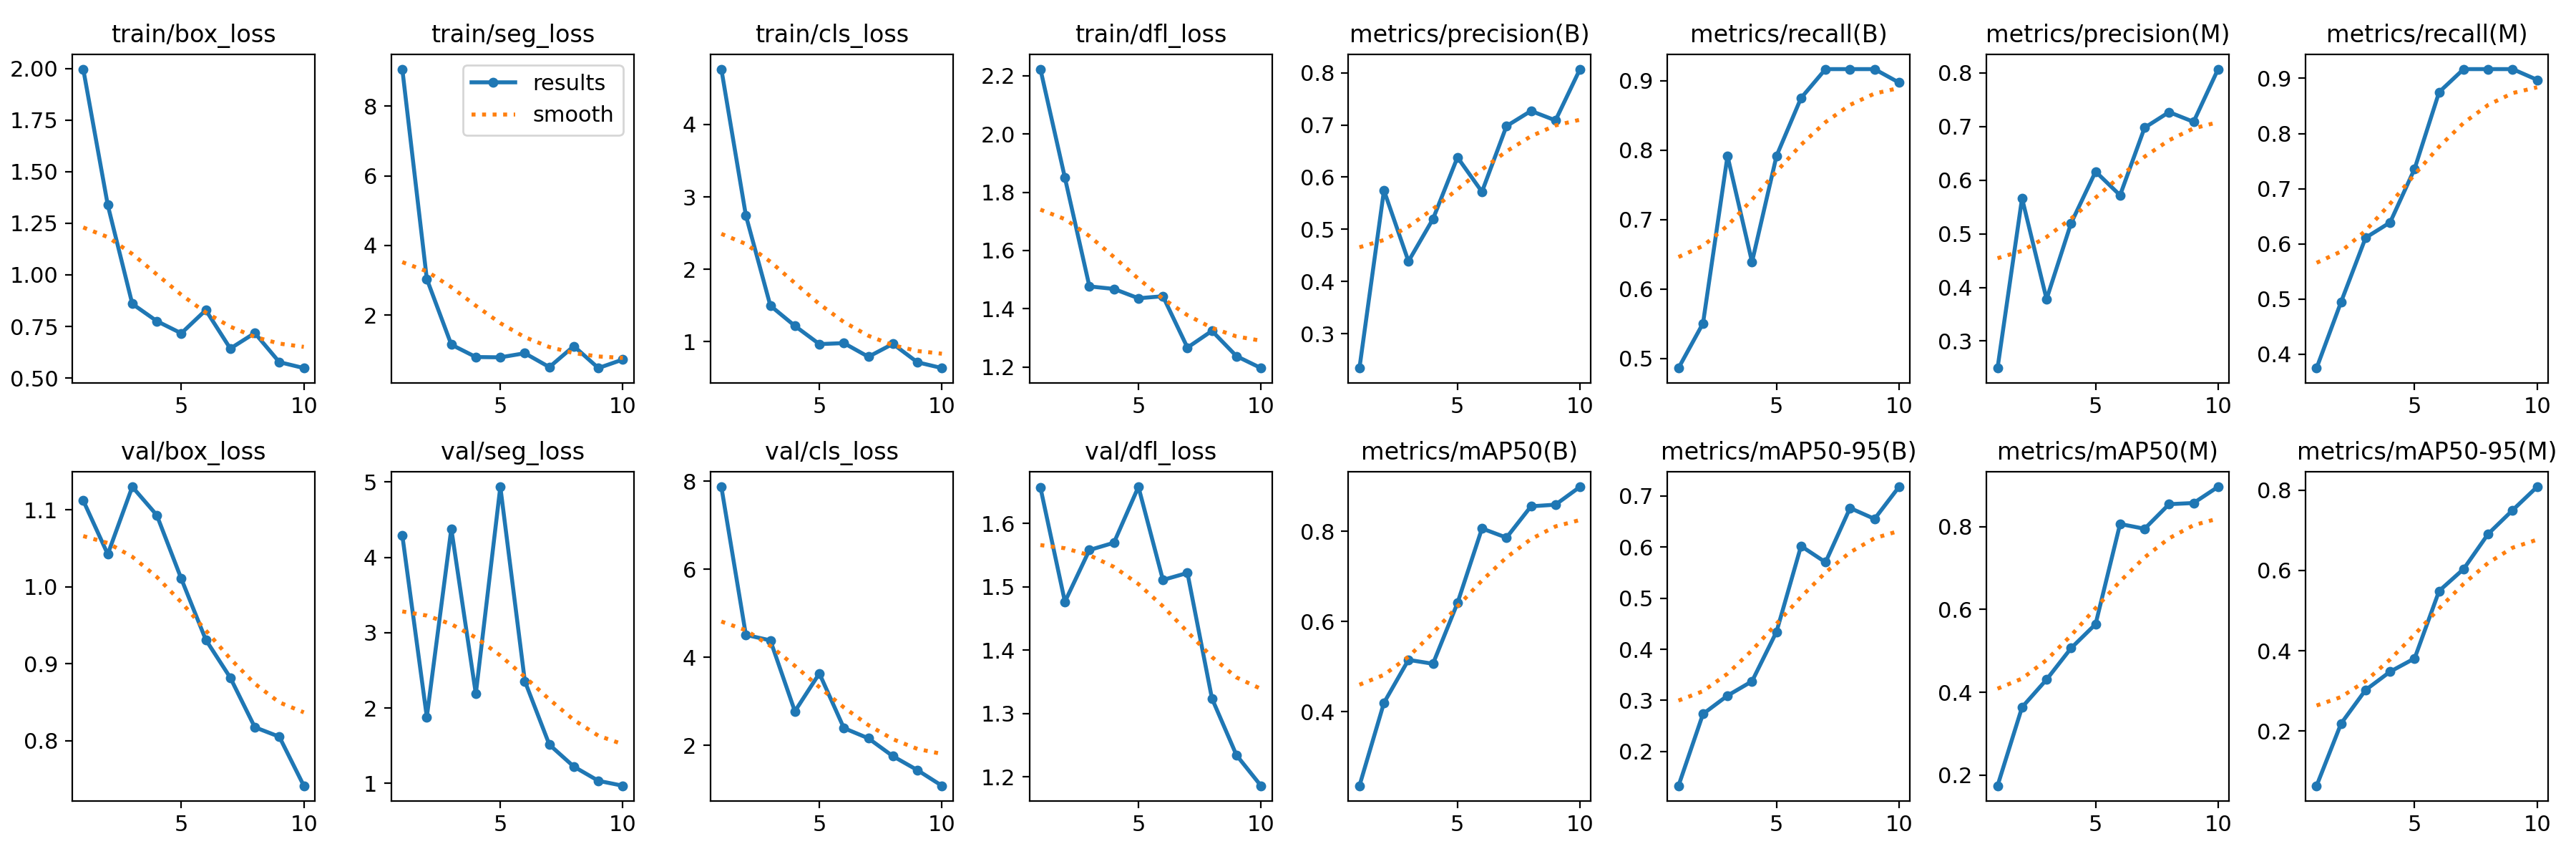

In [ ]:

%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/content


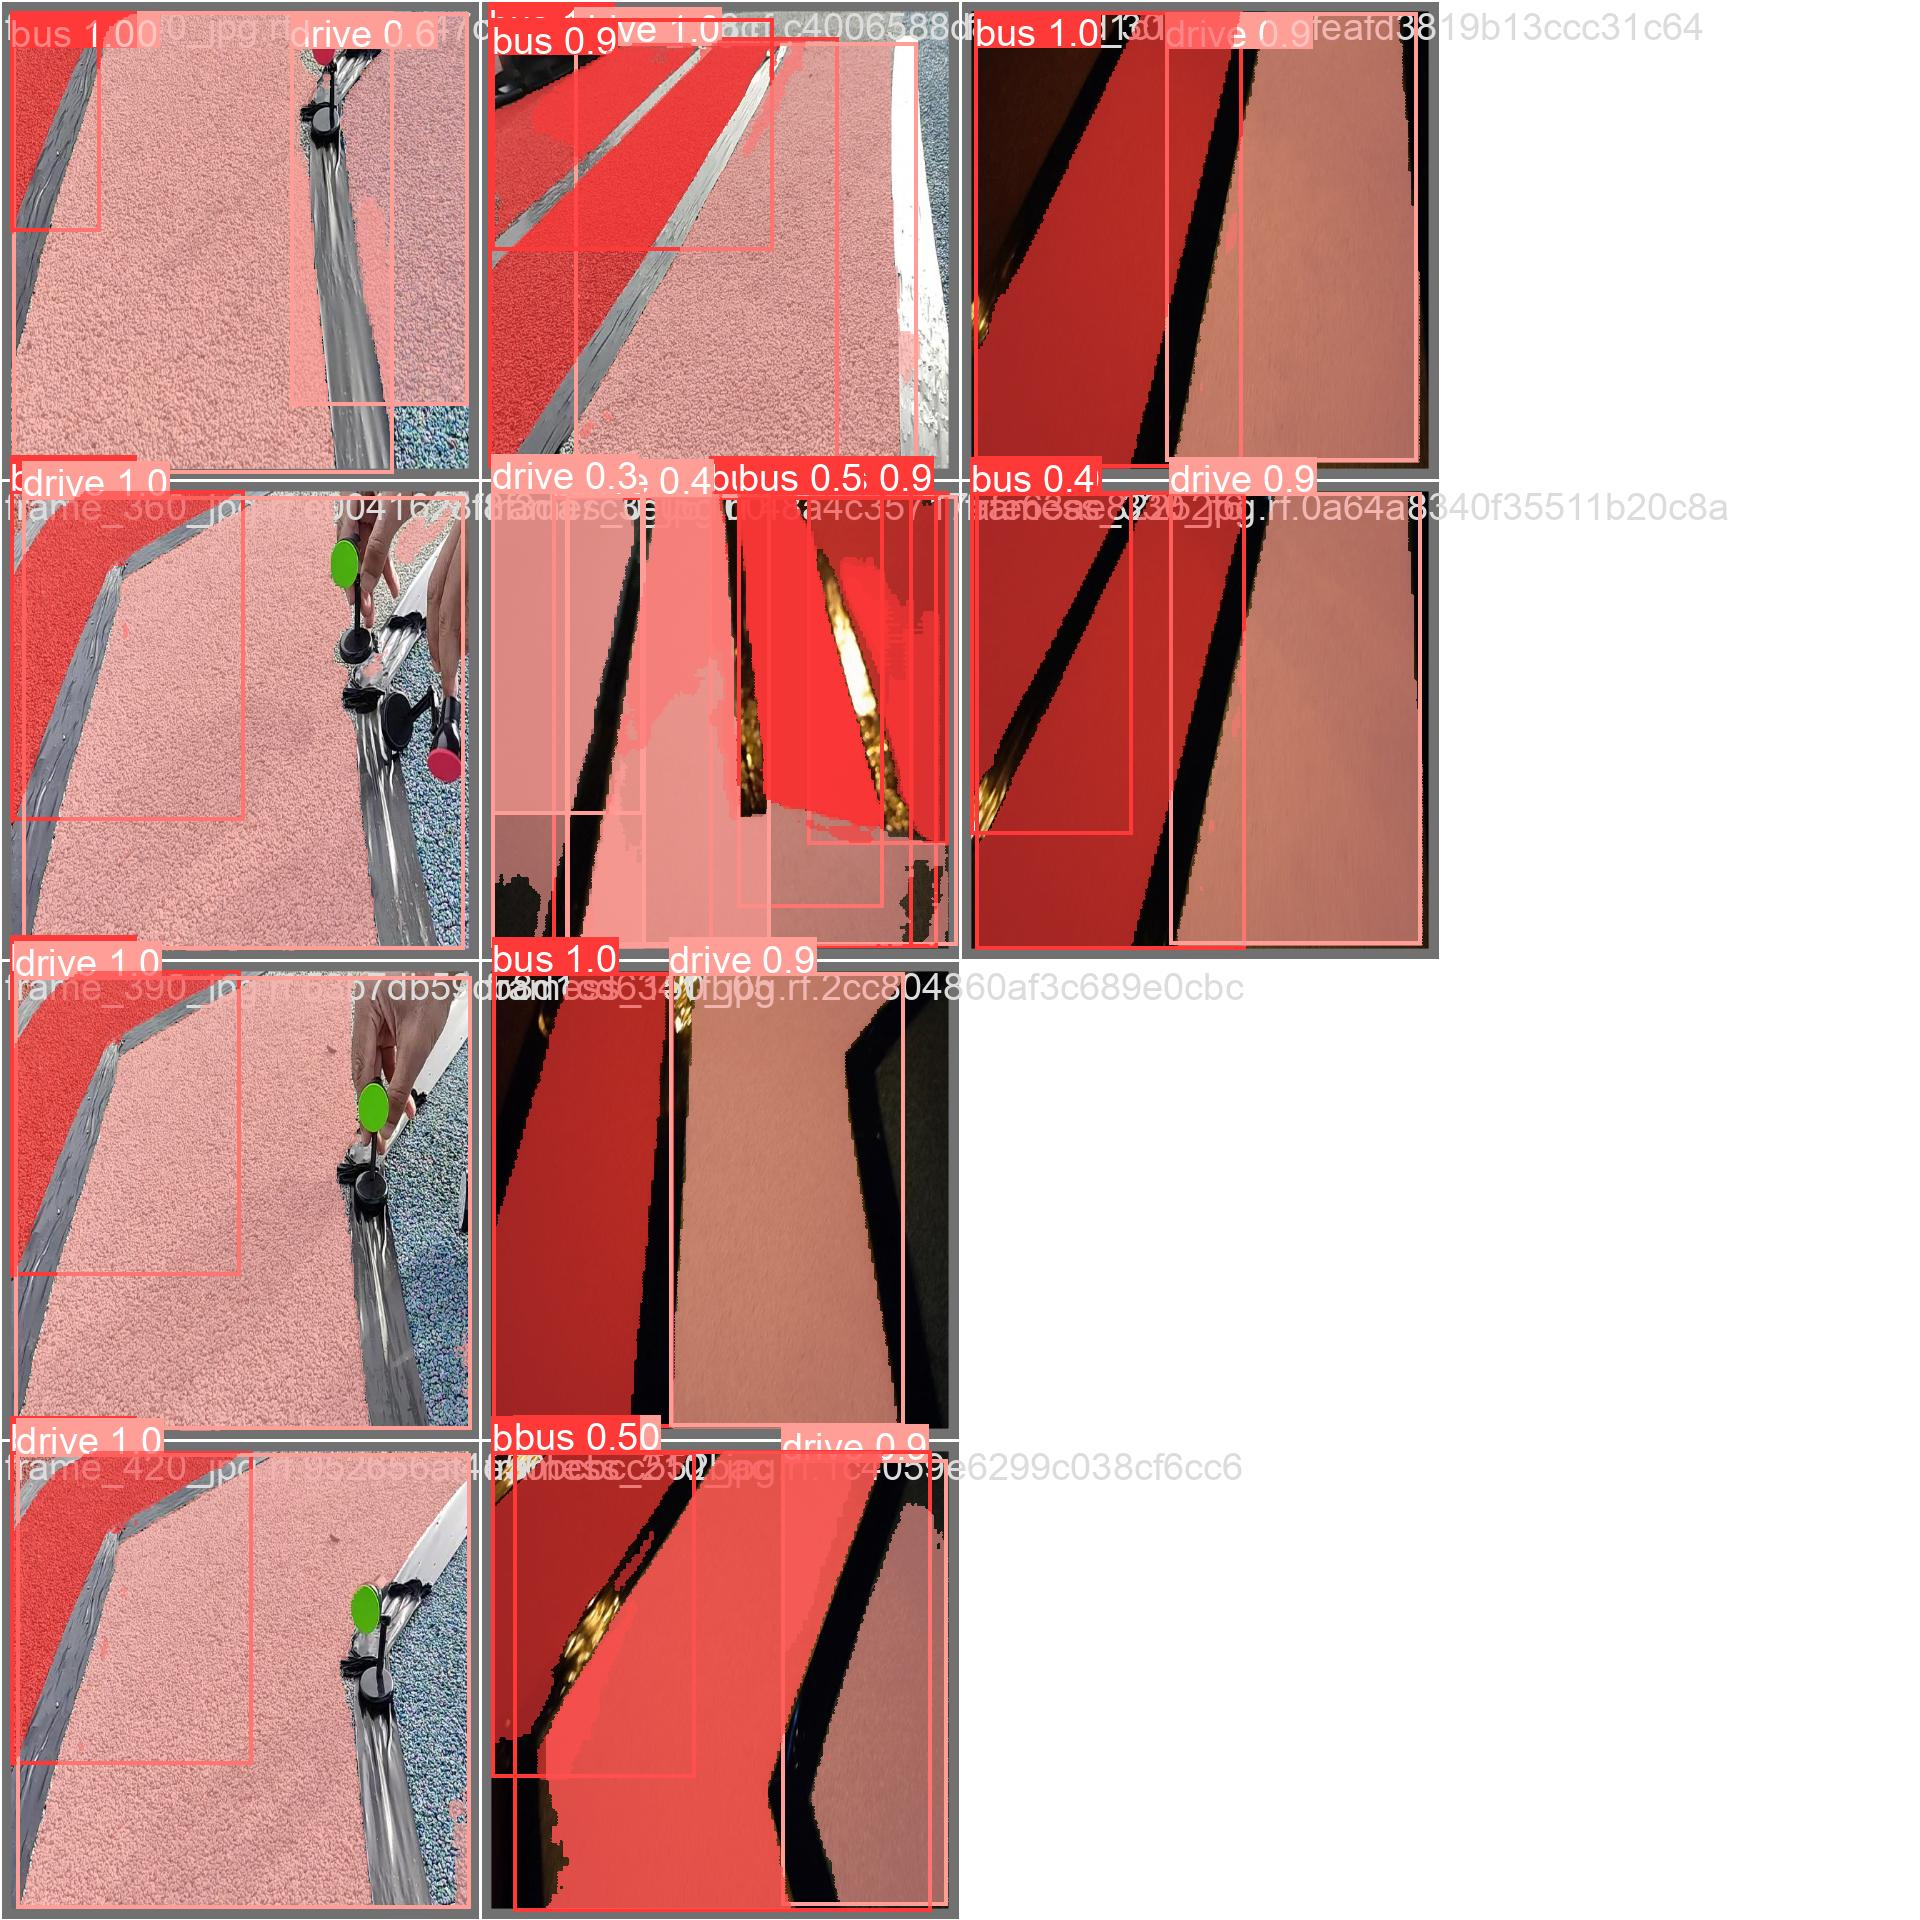

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /content/datasets/Road-Segmentation-2/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100% 10/10 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.02it/s]
                   all         10         21      0.807      0.897      0.899      0.718      0.807      0.897      0.896      0.808
                   bus         10          9      0.742      0.961      0.968      0.837      0.742      0.961      0.968      0.842
                 dri

Inference with Custom Model

In [ ]:
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/5 /content/datasets/Road-Segmentation-2/test/images/frame_180_jpg.rf.af000f0d9ae0132f4dff6152dd3ba5a0.jpg: 640x640 1 bus, 2 drives, 22.6ms
image 2/5 /content/datasets/Road-Segmentation-2/test/images/frame_720_jpg.rf.9c85ef8ab98d1d7cf5c94da6cbbcbb25.jpg: 640x640 1 bus, 1 drive, 22.0ms
image 3/5 /content/datasets/Road-Segmentation-2/test/images/frame_810_jpg.rf.3b2052bb793250dcb3eb38e45d517710.jpg: 640x640 1 drive, 22.2ms
image 4/5 /content/datasets/Road-Segmentation-2/test/images/frames_90_jpg.rf.808c5efe111d4a389374b74e68af60b0.jpg: 640x640 4 buss, 1 drive, 21.0ms
image 5/5 /content/datasets/Road-Segmentation-2/test/images/framess_120_jpg.rf.ccec5a41e75b3b86d20403b080600f6e.jpg: 640x640 1 bus, 1 drive, 22.4ms
Speed: 3.2ms preprocess, 22.0ms inference, 173.5ms post

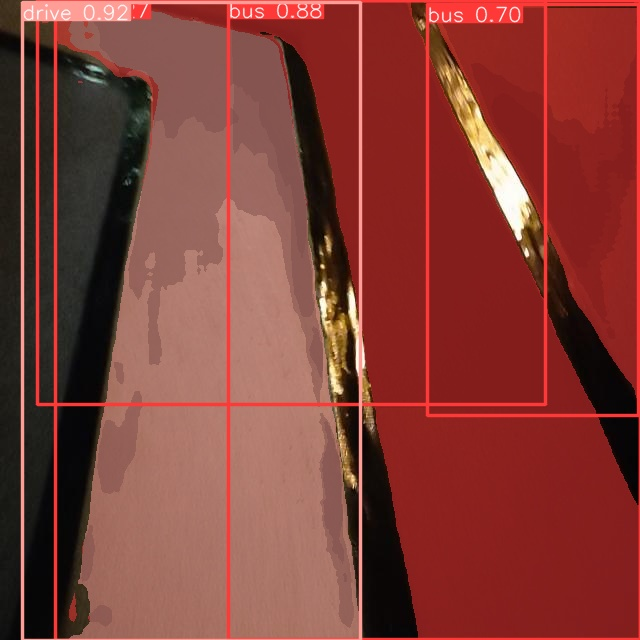

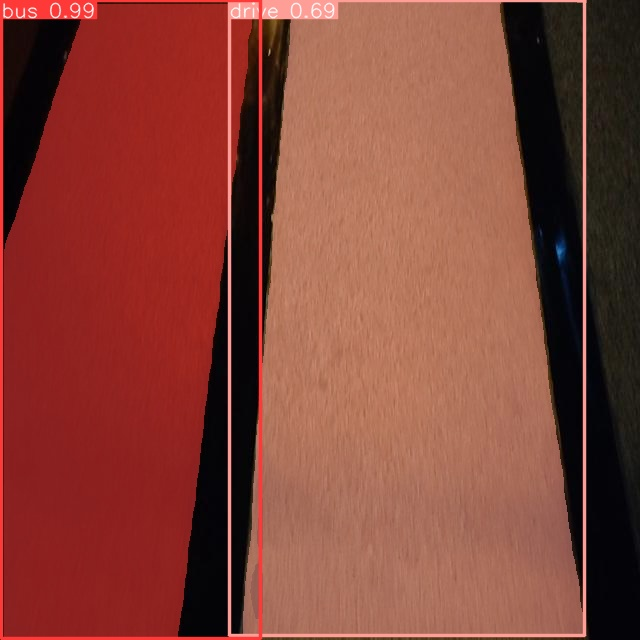

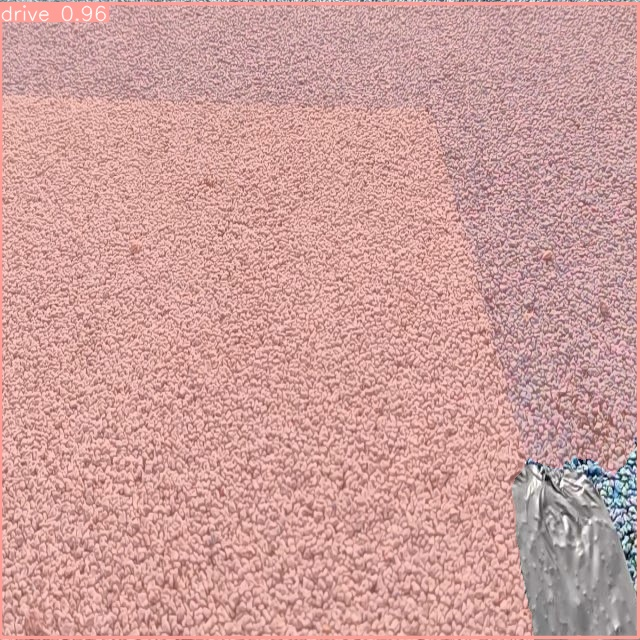

In [ ]:

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")


TEST

In [ ]:
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.50 source={dataset.location}/test/images save=true

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/5 /content/datasets/Road-Segmentation-2/test/images/frame_180_jpg.rf.af000f0d9ae0132f4dff6152dd3ba5a0.jpg: 640x640 1 bus, 1 drive, 21.0ms
image 2/5 /content/datasets/Road-Segmentation-2/test/images/frame_720_jpg.rf.9c85ef8ab98d1d7cf5c94da6cbbcbb25.jpg: 640x640 1 bus, 1 drive, 21.0ms
image 3/5 /content/datasets/Road-Segmentation-2/test/images/frame_810_jpg.rf.3b2052bb793250dcb3eb38e45d517710.jpg: 640x640 1 drive, 20.9ms
image 4/5 /content/datasets/Road-Segmentation-2/test/images/frames_90_jpg.rf.808c5efe111d4a389374b74e68af60b0.jpg: 640x640 2 buss, 1 drive, 20.9ms
image 5/5 /content/datasets/Road-Segmentation-2/test/images/framess_120_jpg.rf.ccec5a41e75b3b86d20403b080600f6e.jpg: 640x640 1 bus, 1 drive, 20.9ms
Speed: 1.8ms preprocess, 20.9ms inference, 128.6ms postp

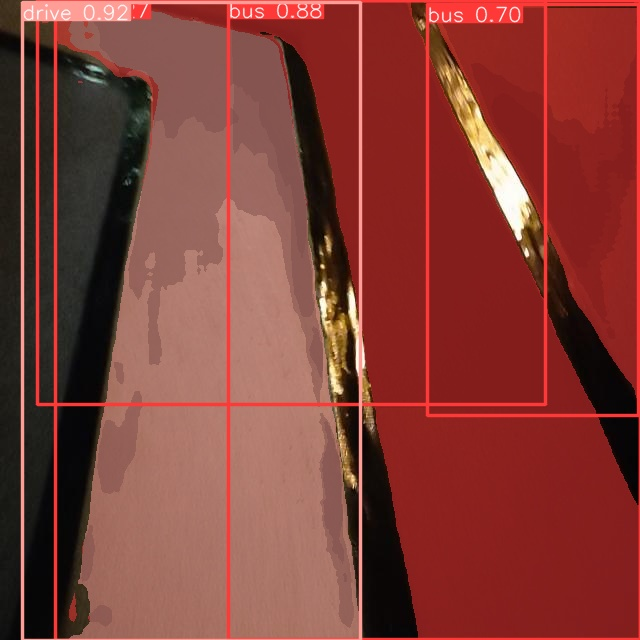

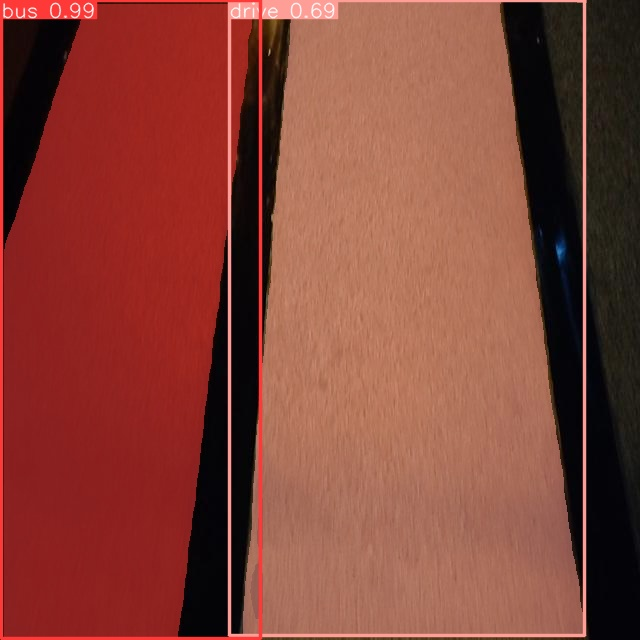

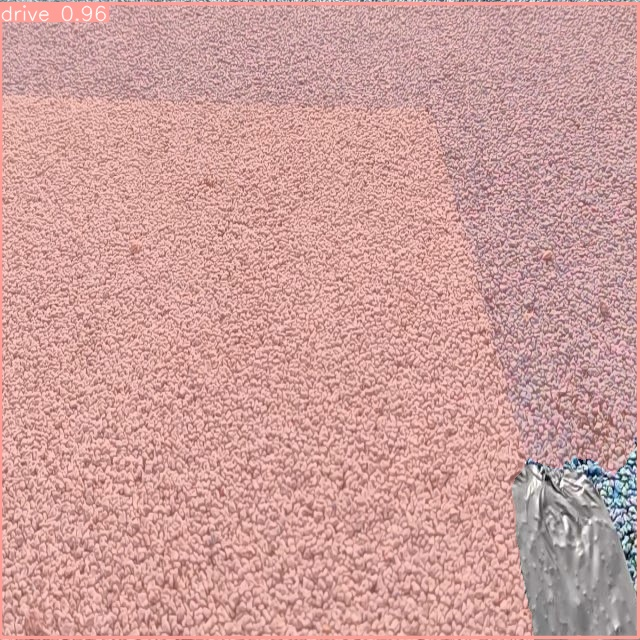

In [ ]:

import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
!yolo task=segment mode=predict model=/content/best.pt conf=0.50 source=/content/framess_150.jpg save=true

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8s-seg summary (fused): 195 layers, 11780374 parameters, 0 gradients, 42.4 GFLOPs

image 1/1 /content/framess_150.jpg: 384x640 1 bus, 1 drive, 783.7ms
Speed: 11.9ms preprocess, 783.7ms inference, 18.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


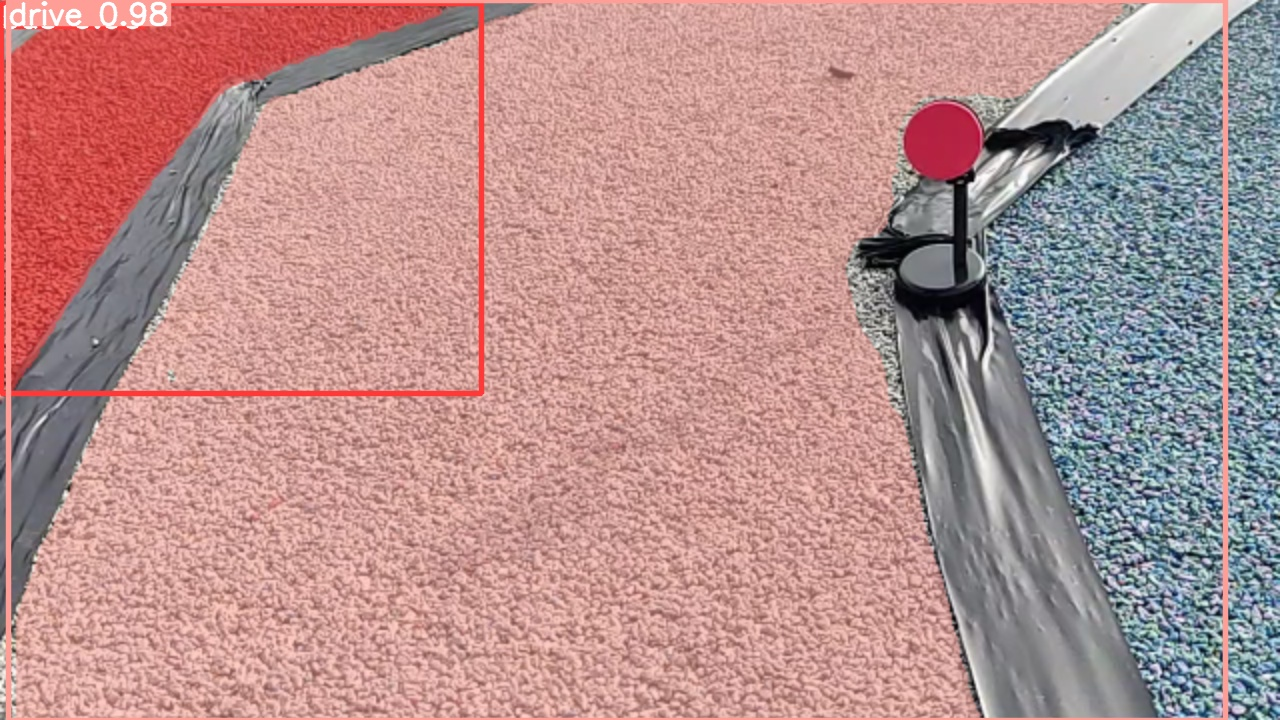

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/segment/predict/frame_270.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
import matplotlib.pyplot as plt
import cv2
def my_imread(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image



Text(0.5, 1.0, 'processed')

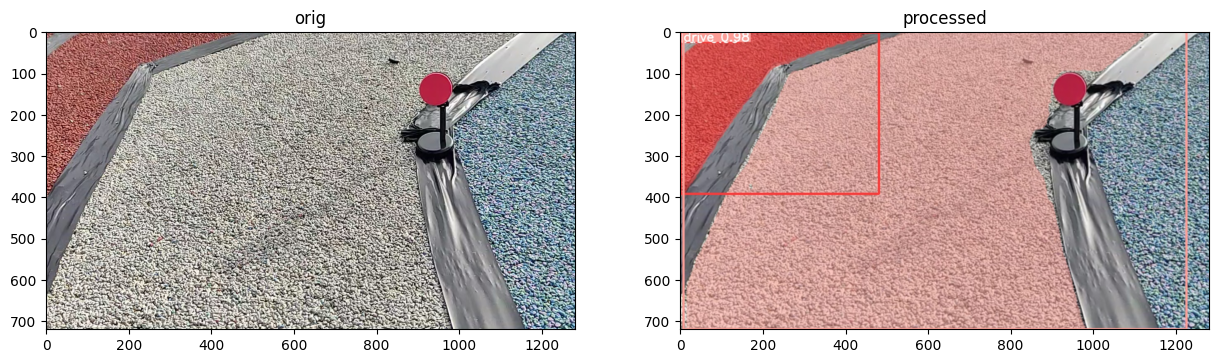

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
image_orig = my_imread("/content/frame_270.jpg")
image_processed = my_imread('/content/runs/segment/predict/frame_270.jpg')
axes[0].imshow(image_orig)
axes[0].set_title("orig")
axes[1].imshow(image_processed)
axes[1].set_title("processed")

Text(0.5, 1.0, 'processed')

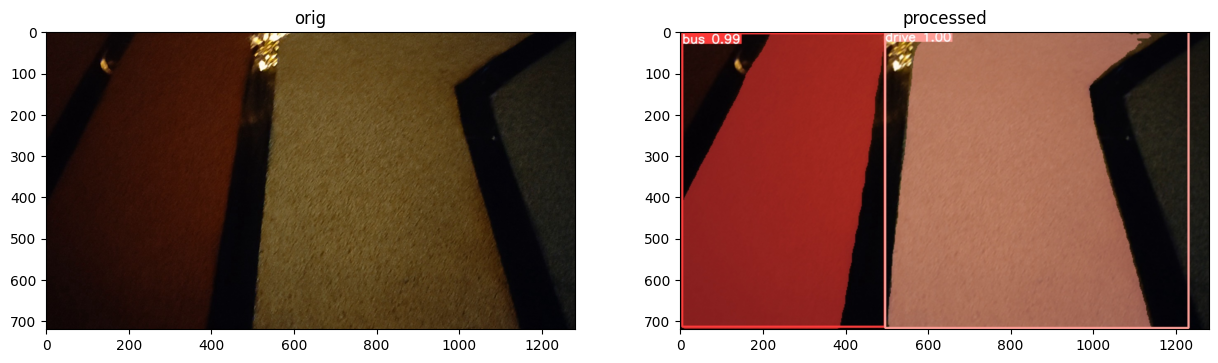

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
image_orig = my_imread("/content/framess_150.jpg")
image_processed = my_imread('/content/runs/segment/predict3/framess_150.jpg')
axes[0].imshow(image_orig)
axes[0].set_title("orig")
axes[1].imshow(image_processed)
axes[1].set_title("processed")